Patient Record Management
Purpose: To practice and demonstrate proficiency in creating and utilizing binary search trees (BST) to store and retrieve patient data efficiently.

Skills Used: Python programming

Knowledge Goals: Understanding and implementing binary search trees

Summary
In this project, you will assume the role of a data scientist who has been hired to create a piece of software that will manage patient records based on various attributes such as patient ID, name, age, diagnosis, blood pressure, pulse, and body temperature. You will have to create a Binary Search Tree (BST) and use it to store and retrieve patient records efficiently. Please ensure classes are in different .py files and you are using imports to import them accordingly. The main will be an .ipynb file.

Part 1: UML Diagram
Create a UML class diagram of the project. Because our projects are not large in scope, these UML diagrams will sometimes be pretty simple. Use any of the UML creators I offered as options on Canvas. Please submit the UML Class Diagram as either PDF or image file such as JPG, PNG, etc. Please use the tutorial given in the Prelude of the book as an example.

![alt text](UML.PNG)

Part 2: Python Implementation
Files & Classes

1. binary_search_tree.py (the code in this file comes directly from the code we did in class, no changes needed)

Node
BinarySearchTree
2. patient_record_mgmt.py

PatientRecord
PatientRecordManagementSystem
3. main.ipynb

main.ipynb (main file to run the project)
4. Folder called data with patient_records.csv in it.


Methods for Classes

Node Class
__init__(self, key, value=None)
BinarySearchTree Class
__init__(self)
insert(self, node)
search(self, desired_key)
remove(self, key)
The following files you will have to create and add to BinarySearchTree class:
inorder_traversal(self, node)
preorder_traversal(self, node)
postorder_traversal(self, node)
 

PatientRecord Class
__init__(self, patient_id, name, age, diagnosis, blood_pressure, pulse, body_temperature)
 

PatientRecordManagementSystem Class
__init__(self): Initializes the patient record management system with an empty BST.
add_patient_record(self, patient_id, name, age, diagnosis, blood_pressure, pulse, body_temperature)
search_patient_record(self, patient_id)
delete_patient_record(self, patient_id)
display_all_records(self): Displays all patient records in the BST using inorder traversal.
build_tree_from_csv(self, file_path): Reads patient data from a CSV file and populates the BST.
visualize_tree(self): Visualizes the BST using Graphviz.
_add_nodes(self, dot, node): A helper method that recursively adds nodes and edges to the Graphviz object.
 

You will need to install the Graphviz Python library. There are plenty of resources on how to do this online.  You will need it for this project and possibly for Project 4.
If you are using a conda env, you will install graphviz into there. If you are using a vm env through pip, you'd install it there. Python library management can be one of the biggest headaches with Python programming. I suggest using the Anaconda Navigator app which gives a GUI interface for managing conda environments and libraries.  You can also install libraries directly in the Jupyter ipynb file. If you do this, remove this programming cell before you push to Github.
If you are using pip: !pip install graphviz
If you are using conda (as you should be): !conda install graphviz
You are given this code for the two Graphviz methods in PatientRecordManagementSystem class.

In [17]:
class Node:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None


class BinarySearchTree:
    # Constructor just assigns an empty root.
    def __init__(self):
        self.root = None

    # Search for a node containing a matching key. Returns the
    # Node object that has the matching key if found, None if
    # not found.
    def search(self, desired_key):
        current_node = self.root
        while current_node is not None:
            # Return the node if the key matches.
            if current_node.key == desired_key:
                return current_node

            # Navigate to the left if the search key is
            # less than the node's key.
            elif desired_key < current_node.key:
                current_node = current_node.left

            # Navigate to the right if the search key is
            # greater than the node's key.
            else:
                current_node = current_node.right

        # The key was not found in the tree.
        return None

    # Inserts the new node into the tree.
    def insert(self, node):

        # Check if the tree is empty
        if self.root is None:
            self.root = node
        else:
            current_node = self.root
            while current_node is not None:
                if node.key < current_node.key:
                    # If there is no left child, add the new
                    # node here; otherwise repeat from the
                    # left child.
                    if current_node.left is None:
                        current_node.left = node
                        current_node = None
                    else:
                        current_node = current_node.left
                else:
                    # If there is no right child, add the new
                    # node here; otherwise repeat from the
                    # right child.
                    if current_node.right is None:
                        current_node.right = node
                        current_node = None
                    else:
                        current_node = current_node.right

    # Removes the node with the matching key from the tree.
    def remove(self, key):
        parent = None
        current_node = self.root

        # Search for the node.
        while current_node is not None:

            # Check if current_node has a matching key.
            if current_node.key == key:
                if (
                    current_node.left is None and current_node.right is None
                ):  # Case 1
                    if parent is None:  # Node is root
                        self.root = None
                    elif parent.left is current_node:
                        parent.left = None
                    else:
                        parent.right = None
                    return  # Node found and removed
                elif (
                    current_node.left is not None
                    and current_node.right is None
                ):  # Case 2
                    if parent is None:  # Node is root
                        self.root = current_node.left
                    elif parent.left is current_node:
                        parent.left = current_node.left
                    else:
                        parent.right = current_node.left
                    return  # Node found and removed
                elif (
                    current_node.left is None
                    and current_node.right is not None
                ):  # Case 2
                    if parent is None:  # Node is root
                        self.root = current_node.right
                    elif parent.left is current_node:
                        parent.left = current_node.right
                    else:
                        parent.right = current_node.right
                    return  # Node found and removed
                else:  # Case 3
                    # Find successor (leftmost child of right subtree)
                    successor = current_node.right
                    while successor.left is not None:
                        successor = successor.left
                    current_node.key = (
                        successor.key
                    )  # Copy successor to current node
                    parent = current_node
                    current_node = (
                        current_node.right
                    )  # Remove successor from right subtree
                    key = parent.key  # Loop continues with new key
            elif current_node.key < key:  # Search right
                parent = current_node
                current_node = current_node.right
            else:  # Search left
                parent = current_node
                current_node = current_node.left

        return  # Node not found

    # In-order Traversal: Left -> Node -> Right
    def inorder_traversal(self, node):
        if node is not None:
            self.inorder_traversal(node.left)  # Visit left subtree
            print(node.key, end=" ")  # Visit node
            self.inorder_traversal(node.right)  # Visit right subtree

    # Pre-order Traversal: Node -> Left -> Right
    def preorder_traversal(self, node):
        if node is not None:
            print(node.key, end=" ")  # Visit node
            self.preorder_traversal(node.left)  # Visit left subtree
            self.preorder_traversal(node.right)  # Visit right subtree

    # Post-order Traversal: Left -> Right -> Node
    def postorder_traversal(self, node):
        if node is not None:
            self.postorder_traversal(node.left)  # Visit left subtree
            self.postorder_traversal(node.right)  # Visit right subtree
            print(node.key, end=" ")  # Visit node

In [18]:
class PatientRecord:
    def __init__(
        self,
        patient_id,
        name,
        age,
        diagnosis,
        blood_pressure,
        pulse,
        body_temperature,
    ):
        """
        Initialize a PatientRecord object with patient details.

        :param patient_id: Unique identifier for the patient
        :param name: Name of the patient
        :param age: Age of the patient
        :param diagnosis: Diagnosis details
        :param blood_pressure: Blood pressure reading
        :param pulse: Pulse rate
        :param body_temperature: Body temperature
        """
        self.patient_id = patient_id
        self.name = name
        self.age = age
        self.diagnosis = diagnosis
        self.blood_pressure = blood_pressure
        self.pulse = pulse
        self.body_temperature = body_temperature

    def __str__(self):
        """
        Return a string representation of the PatientRecord.
        """
        return (
            f"Patient ID: {self.patient_id}\n"
            f"Name: {self.name}\n"
            f"Age: {self.age}\n"
            f"Diagnosis: {self.diagnosis}\n"
            f"Blood Pressure: {self.blood_pressure}\n"
            f"Pulse: {self.pulse}\n"
            f"Body Temperature: {self.body_temperature}°C\n"
        )

In [19]:
import graphviz  # Required for tree visualization
import csv


class PatientRecordManagementSystem:
    def __init__(self):
        """
        Initializes the patient record management system with an empty BST.
        """
        self.bst = BinarySearchTree()

    def add_patient_record(
        self,
        patient_id,
        name,
        age,
        diagnosis,
        blood_pressure,
        pulse,
        body_temperature,
    ):
        """
        Adds a new patient record to the system.
        """
        new_record = PatientRecord(
            patient_id,
            name,
            age,
            diagnosis,
            blood_pressure,
            pulse,
            body_temperature,
        )
        new_node = Node(patient_id, new_record)  # Use patient_id as the key
        self.bst.insert(new_node)

    def search_patient_record(self, patient_id):
        """
        Searches for a patient record in the BST using the patient ID.
        """
        node = self.bst.search(patient_id)
        if node is not None:
            return node.value  # The PatientRecord is stored as the value
        else:
            print(f"No record found for Patient ID: {patient_id}")
            return None

    def delete_patient_record(self, patient_id):
        """
        Deletes a patient record from the system using the patient ID.
        """
        self.bst.remove(patient_id)
        print(
            f"Record with Patient ID {patient_id} has been deleted (if it existed)."
        )

    def display_all_records(self):
        """
        Displays all patient records in the BST using in-order traversal.
        """
        print("Patient Records (In-order Traversal):")

        def display_node(node):
            if node is not None:
                display_node(node.left)
                print(node.value)  # The PatientRecord is stored as the value
                display_node(node.right)

        display_node(self.bst.root)

    def build_tree_from_csv(self, file_path):
        with open(file_path, mode="r") as file:
            csv_reader = csv.reader(file)

            # Skip the first line (header row)
            next(csv_reader)

            # Process each record in the CSV file
            for row in csv_reader:
                # Parse each field from the row
                patient_id = int(row[0])
                name = row[1]
                age = int(row[2])
                diagnosis = row[3]
                blood_pressure = row[4]
                pulse = int(row[5])
                body_temperature = float(row[6])

                # Create a new PatientRecord object with the data
                patient_record = PatientRecord(
                    patient_id,
                    name,
                    age,
                    diagnosis,
                    blood_pressure,
                    pulse,
                    body_temperature,
                )

                # Create a new Node with the patient record
                node = Node(patient_id, patient_record)

                # Insert the node into the BST
                self.bst.insert(node)

    def visualize_tree(self):
        dot = graphviz.Digraph()
        self._add_nodes(dot, self.bst.root)
        return dot

    def _add_nodes(self, dot, node):
        if node:
            dot.node(str(node.key), f"{node.key}: {node.value.name}")
            if node.left:
                dot.edge(str(node.key), str(node.left.key))
                self._add_nodes(dot, node.left)
            if node.right:
                dot.edge(str(node.key), str(node.right.key))
                self._add_nodes(dot, node.right)

In [20]:
import graphviz
import csv


class Main:
    def __init__(self):
        # Initialize the Patient Record Management System
        self.prms = PatientRecordManagementSystem()

    def main(self):
        # Load patient records from the CSV file
        self.prms.build_tree_from_csv("patient_records.csv")

        # Display all records in the BST
        print("All Patient Records:")
        self.prms.display_all_records()

        # Visualize and save the tree as 'initial_patient_tree.png'
        self.visualize_and_save_tree("initial_patient_tree")

        # Search for patient records with IDs 2, 25, and 47
        print("\nSearch for patient records with IDs 2, 25, and 47:")
        for pid in [2, 25, 47]:
            record = self.prms.search_patient_record(pid)
            if record:
                print(record)
            else:
                print(f"Patient ID {pid} not found.")
        print()

        # Delete patient records with IDs 3, 10, and 30
        print("\nDeleting patient records with IDs 3, 10, and 30:")
        for pid in [3, 10, 30]:
            self.prms.delete_patient_record(pid)
        print()

        # Display all records after deletion
        print("\nAll Patient Records After Deletion:")
        self.prms.display_all_records()
        print()

        # Visualize and save the tree after deletion
        self.visualize_and_save_tree("after_deletion_patient_tree")

        # Insert new patient records
        new_records = [
            (51, "Jacob Marley", 40, "Migraine", "120/80", 70, 37.0),
            (58, "Robert Shea", 55, "Back Pain", "130/85", 75, 36.8),
            (3, "Joan Smith", 33, "Anxiety", "115/75", 68, 37.1),
        ]

        print("\nInserting new patient records:")
        for record in new_records:
            self.prms.add_patient_record(*record)

        # Display all records after insertion
        print("\nAll Patient Records After Insertion:")
        self.prms.display_all_records()

        # Visualize and save the tree after insertion
        self.visualize_and_save_tree("after_insertion_patient_tree")

        # Perform traversals after all operations
        print("\nAll patient records (inorder traversal):")
        self.prms.bst.inorder_traversal(self.prms.bst.root)

        print("\nAll patient records (preorder traversal):")
        self.prms.bst.preorder_traversal(self.prms.bst.root)

        print("\nAll patient records (postorder traversal):")
        self.prms.bst.postorder_traversal(self.prms.bst.root)

    def visualize_and_save_tree(self, filename):
        """Helper method to visualize and save the tree as a PNG"""
        dot = self.prms.visualize_tree()
        dot.render(filename, format="png", cleanup=True)
        print(f"Tree visualized and saved as '{filename}.png'")


# Run the main method if this script is executed directly
if __name__ == "__main__":
    main_class = Main()
    main_class.main()

All Patient Records:
Patient Records (In-order Traversal):
Patient ID: 1
Name: Peter Parker
Age: 35
Diagnosis: Flu
Blood Pressure: 120/80
Pulse: 70
Body Temperature: 37.0°C

Patient ID: 3
Name: Clint Barton
Age: 45
Diagnosis: Hypertension
Blood Pressure: 140/90
Pulse: 80
Body Temperature: 36.9°C

Patient ID: 5
Name: Tony Stark
Age: 60
Diagnosis: Arthritis
Blood Pressure: 125/78
Pulse: 72
Body Temperature: 36.7°C

Patient ID: 6
Name: Natasha Romanoff
Age: 32
Diagnosis: Cold
Blood Pressure: 115/75
Pulse: 68
Body Temperature: 37.1°C

Patient ID: 7
Name: Scott Lang
Age: 47
Diagnosis: Cancer
Blood Pressure: 135/88
Pulse: 77
Body Temperature: 37.0°C

Patient ID: 8
Name: Drax
Age: 55
Diagnosis: Heart Disease
Blood Pressure: 145/92
Pulse: 82
Body Temperature: 36.8°C

Patient ID: 9
Name: Wade Wilson
Age: 40
Diagnosis: Flu
Blood Pressure: 120/80
Pulse: 70
Body Temperature: 36.9°C

Patient ID: 10
Name: Professor X
Age: 29
Diagnosis: Pneumonia
Blood Pressure: 130/85
Pulse: 75
Body Temperature: 37.

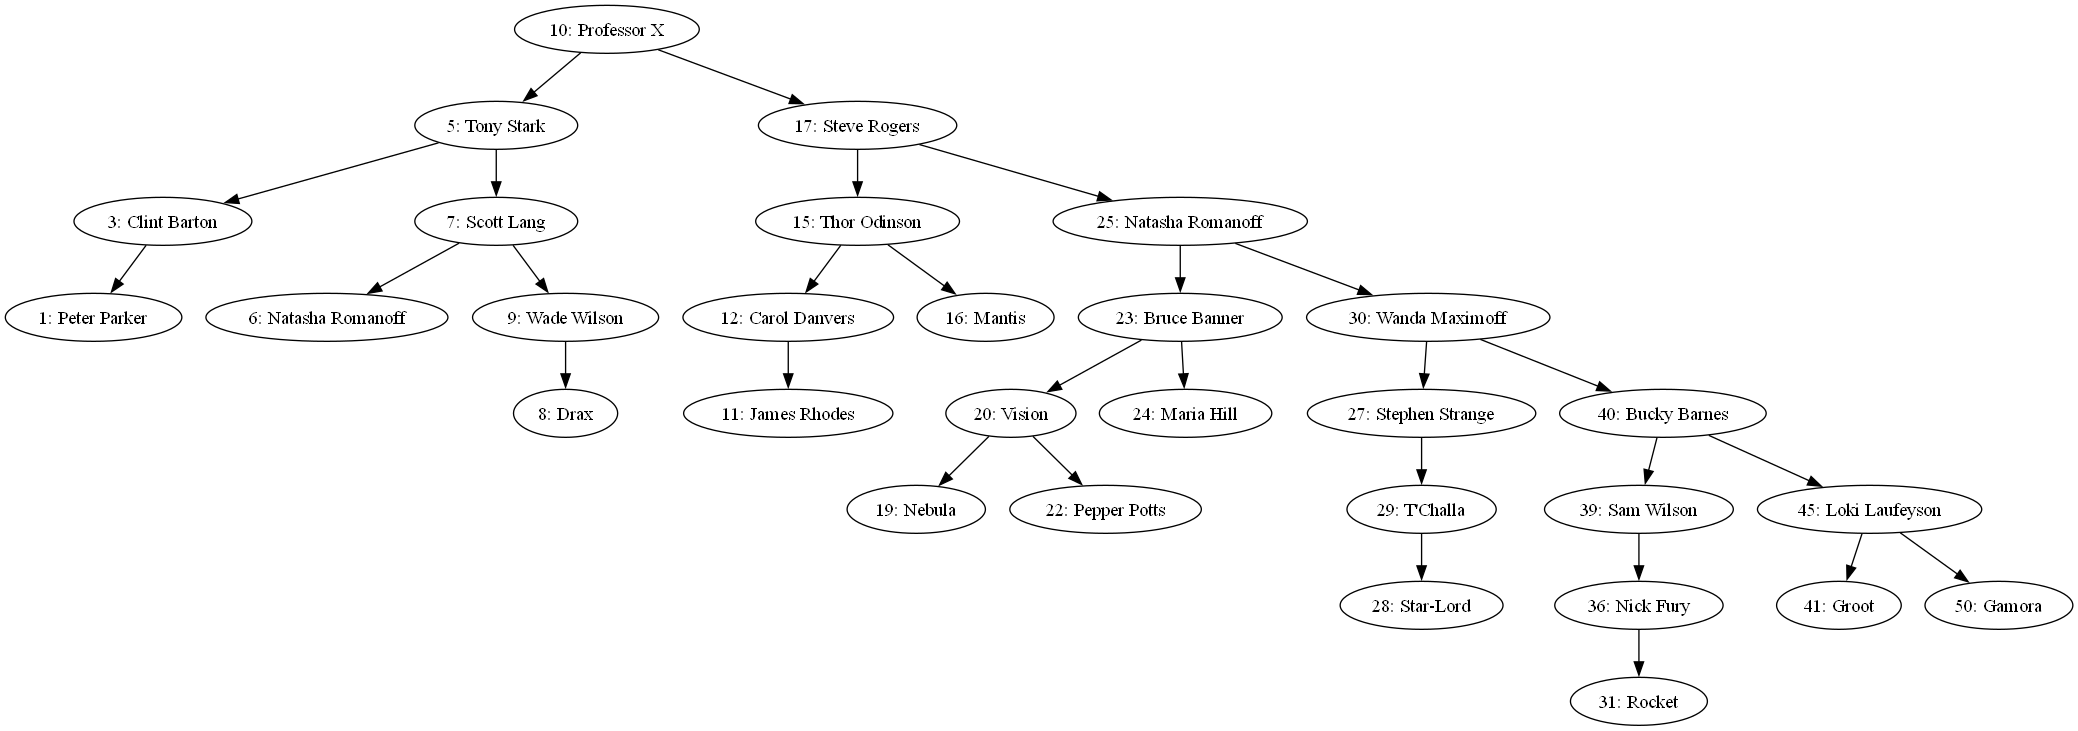

In [ ]:
from IPython.display import Image

# Display the image inline
Image("initial_patient_tree.png")

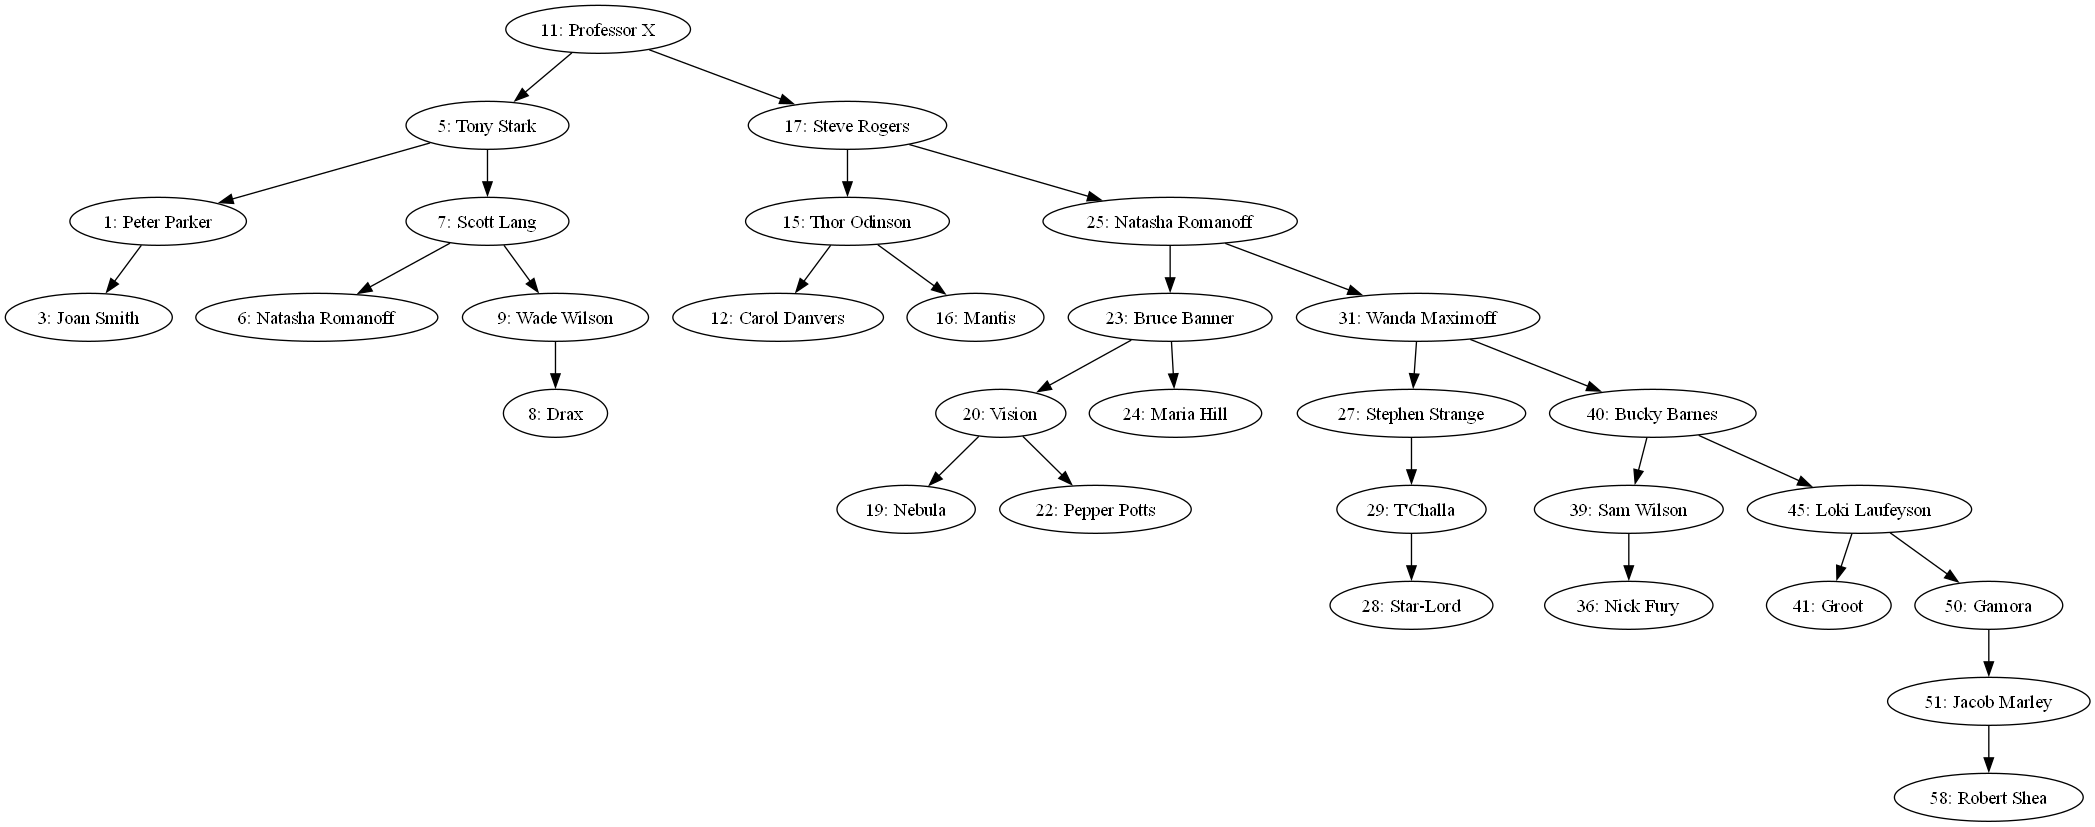

In [27]:
from IPython.display import Image

Image("after_insertion_patient_tree.png")

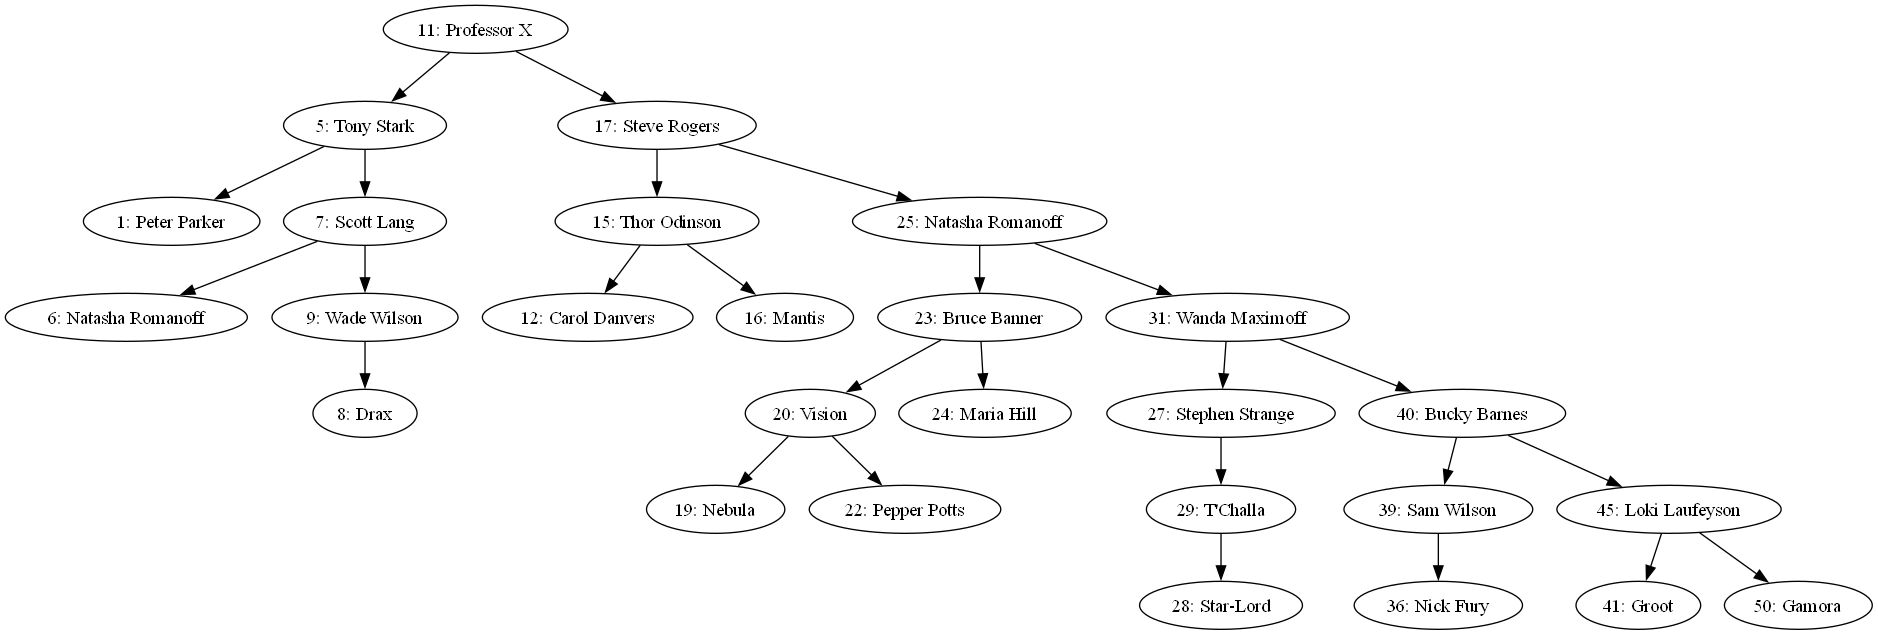

In [29]:
from IPython.display import Image

Image("after_deletion_patient_tree.png")

In [ ]:
a